In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

from sklearn.impute import KNNImputer

# Problem Statement

The Covid pandemic has brought to light that living in spacious, modern, and tranquil homes is not a luxury but a necessity to strive as healthy and fulfilled individuals. At Black Rock hedge fund we understand that this need is reflected through many Americans. That's why we have decided to invest in the creation of spacious, affordable and long-lasting homes in certain states of the US. We have hired a team of data scientists responsible for modeling the housing market of each state in order to better evaluate our decisions. 

As a data analyst responsible for modeling the housing market in Iowa, I am tasked to investigate and evaluate the highest features that will predict sale prices. Next, I investigate what people look most in homes and make recommendations on whether or not Black Rock should invest in Iowa.


Note: This is purely a thought experiment, therefore for the sake of this project, we are not taking into consideration the time frame of this model, assuming that the data listed is fairly recent. 
 

# Data Cleaning

In [2]:
train=pd.read_csv('./datasets/train.csv')

In [3]:
test=pd.read_csv('./datasets/test.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#Dropping the outliers for the Lot Area

In [6]:
null_grg_yr = train[train['Garage Yr Blt'].isnull()]
train.loc[null_grg_yr.index,'Garage Yr Blt'] = train['Year Built']

In [7]:
#Replacing the Null values for the Year the Garage with built with the Year the house was built.

In [8]:
train.dropna(subset=['Garage Area'],inplace = True)

In [9]:
train = train.drop(train[train['Garage Yr Blt'] >= 2010].index)

In [10]:
train = train.drop(train[train['Gr Liv Area'] > 3000].index)

In [11]:
train = train.drop(train[train['Lot Area'] > 40000].index)

In [12]:
#Trying to Imput the data for Garage Area using K Nearest Neighbors

In [13]:
train['Garage Area']=train['Garage Area'].replace(0,np.NaN)

In [14]:
knn_imp = KNNImputer()
knn_imputed = knn_imp.fit_transform(train[['Garage Area']])

In [15]:
train['Garage Area'] = knn_imputed

In [16]:
train.dropna(subset=['Total Bsmt SF'],inplace = True)

# Exploratory Data Analysis

In [17]:
#Exploring Lot Area

<AxesSubplot:title={'center':'Lot Area vs SalePrice'}, xlabel='Lot Area', ylabel='SalePrice'>

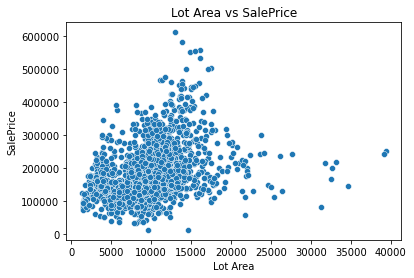

In [18]:
plt.title('Lot Area vs SalePrice')

sns.scatterplot(data = train, x= 'Lot Area',y='SalePrice')

In [19]:
#Will need to drop outliers such as Lot Area<60,000

In [20]:
#Exploring Lot Shape

<AxesSubplot:title={'center':'Lot Shape Histogram'}, xlabel='Lot Shape', ylabel='Count'>

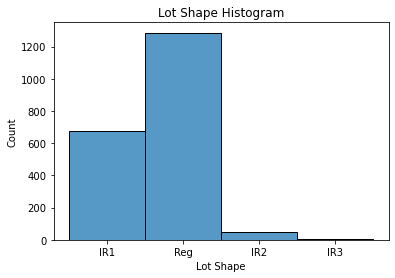

In [21]:
plt.title('Lot Shape Histogram')

sns.histplot(data = train, x= 'Lot Shape')

<AxesSubplot:title={'center':'Overall Quality Histogram'}, xlabel='Overall Qual', ylabel='Count'>

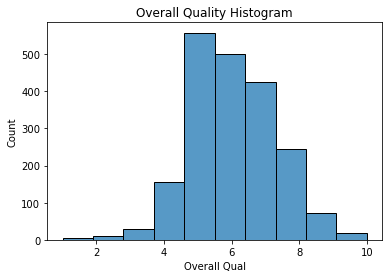

In [22]:
plt.title('Overall Quality Histogram')

sns.histplot(train, x ='Overall Qual',bins=10)

<AxesSubplot:title={'center':'House Year Built vs SalePrice'}, xlabel='Year Built', ylabel='SalePrice'>

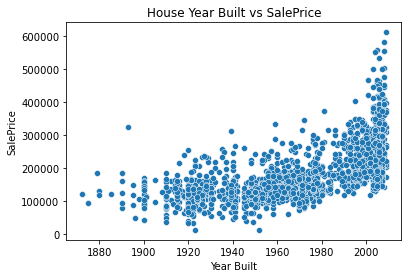

In [23]:
plt.title('House Year Built vs SalePrice')

sns.scatterplot(data= train,x='Year Built',y='SalePrice')

<AxesSubplot:title={'center':'Above Ground Living Area vs SalePrice'}, xlabel='Gr Liv Area', ylabel='SalePrice'>

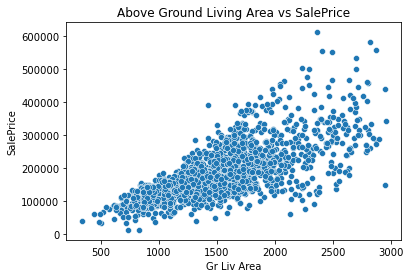

In [24]:
plt.title('Above Ground Living Area vs SalePrice')

sns.scatterplot(data = train, x = 'Gr Liv Area', y= 'SalePrice')

<AxesSubplot:title={'center':'Garage Area vs SalePrice'}, xlabel='Garage Area', ylabel='SalePrice'>

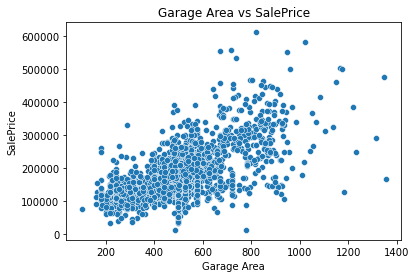

In [25]:
plt.title('Garage Area vs SalePrice')

sns.scatterplot(data = train, x = 'Garage Area', y= 'SalePrice')

In [26]:
#Looks very linear, will have to drop the two outliers. Gr Liv Area<=3000

<AxesSubplot:title={'center':'Garage Cars Histogram'}, xlabel='Garage Cars', ylabel='SalePrice'>

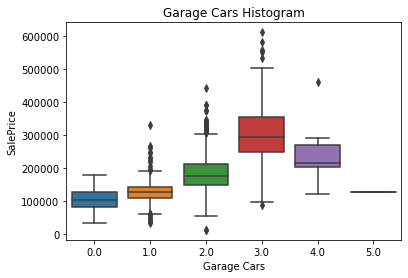

In [27]:
plt.title('Garage Cars Histogram')

sns.boxplot(data = train, x = 'Garage Cars', y= 'SalePrice')

In [28]:
#Garage Yr Built

<AxesSubplot:title={'center':'Garage Year Built vs SalePrice'}, xlabel='Garage Yr Blt', ylabel='SalePrice'>

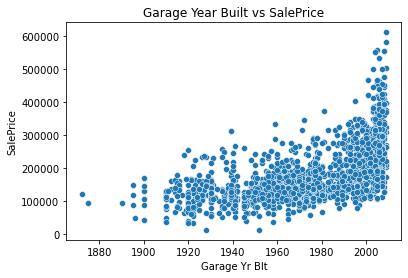

In [29]:
plt.title('Garage Year Built vs SalePrice')

sns.scatterplot(data = train, x = 'Garage Yr Blt', y= 'SalePrice')

<AxesSubplot:title={'center':'Open Porch SF vs SalePrice'}, xlabel='Open Porch SF', ylabel='SalePrice'>

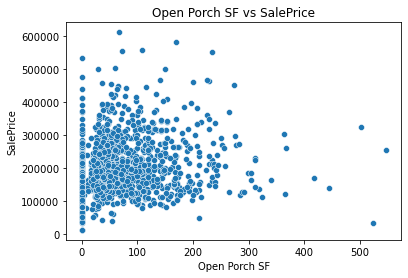

In [30]:
plt.title('Open Porch SF vs SalePrice')

sns.scatterplot(data = train, x = 'Open Porch SF', y= 'SalePrice')

<AxesSubplot:title={'center':'Basement SF vs SalePrice'}, xlabel='Total Bsmt SF', ylabel='SalePrice'>

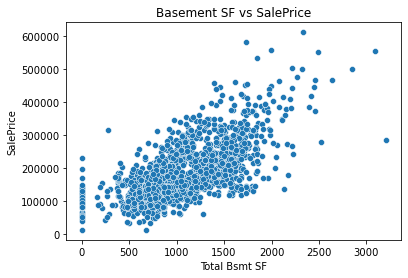

In [31]:
plt.title('Basement SF vs SalePrice')

sns.scatterplot(data = train, x = 'Total Bsmt SF', y= 'SalePrice')

<AxesSubplot:title={'center':'Foundation Histogram'}, xlabel='Foundation', ylabel='Count'>

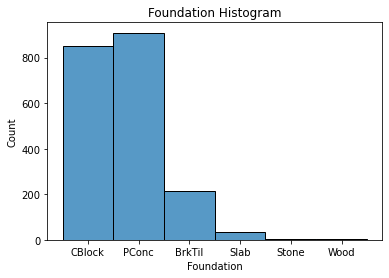

In [32]:
plt.title('Foundation Histogram')

sns.histplot(data = train, x = 'Foundation')

<AxesSubplot:title={'center':'MS Zoning Histogram'}, xlabel='MS Zoning', ylabel='Count'>

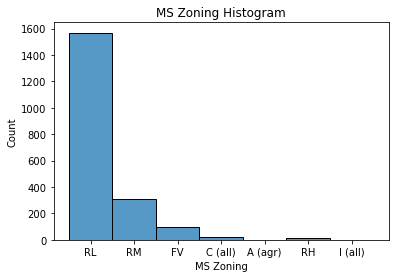

In [33]:
plt.title('MS Zoning Histogram')

sns.histplot(data = train, x = 'MS Zoning')

# Data Engineering

Note: Once a feature is created in this section of the notebook all the EDA and cleaning will be done here.

In [34]:
train['Overall_Q_C']=train['Overall Qual'] +train['Overall Cond']

<AxesSubplot:title={'center':'Overall Quality and Condition vs SalePrice'}, xlabel='Overall_Q_C', ylabel='Count'>

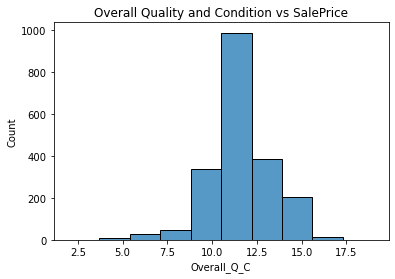

In [35]:
plt.title('Overall Quality and Condition vs SalePrice')

sns.histplot(data = train,x= 'Overall_Q_C',bins =10)

In [36]:
#Lets Visualize this new column with our SalePrice

<AxesSubplot:xlabel='Overall_Q_C', ylabel='SalePrice'>

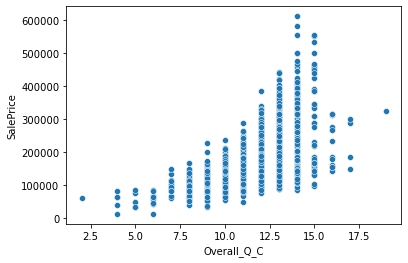

In [37]:
sns.scatterplot(data=train, x='Overall_Q_C',y = 'SalePrice')

In [38]:
train['1_2_floor_SF']=train['1st Flr SF'] + train['1st Flr SF']

In [39]:
train['total bath'] = train['Full Bath'] +train['Half Bath']

In [113]:
train['total bath'].dtypes

dtype('int64')

# Making a Linear Regression Model

In [40]:
X=train[['Lot Area','Overall_Q_C','Year Built','Gr Liv Area','Garage Area','TotRms AbvGrd','1_2_floor_SF','Neighborhood','total bath','Foundation','MS Zoning','Garage Type','Total Bsmt SF']]
X=pd.get_dummies(X,columns=['TotRms AbvGrd','Year Built','total bath','Foundation','MS Zoning','Garage Type','Neighborhood'],drop_first = True)
y=train['SalePrice']

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X,y)

LinearRegression()

In [43]:
cross_val_score(lr,X,y,cv=3).mean()

0.8636125808756178

In [44]:
preds= lr.predict(X)
resids = y - preds
print('RMSE is',metrics.mean_squared_error(y,preds,squared=False))

RMSE is 25021.957878156547


### Train/Testing our Data

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 42)
lr.fit(X_train,y_train)
print('Train score is',lr.score(X_train,y_train))
print('Test score is ' ,lr.score(X_test,y_test))
preds_test=lr.predict(X_test)
resids_test=y_test-preds_test
print('RMSE for test set is',metrics.mean_squared_error(y_test,preds_test,squared=False))

Train score is 0.8944421759942518
Test score is  0.8664084500743553
RMSE for test set is 28753.116427970417


### Evaluating our Model

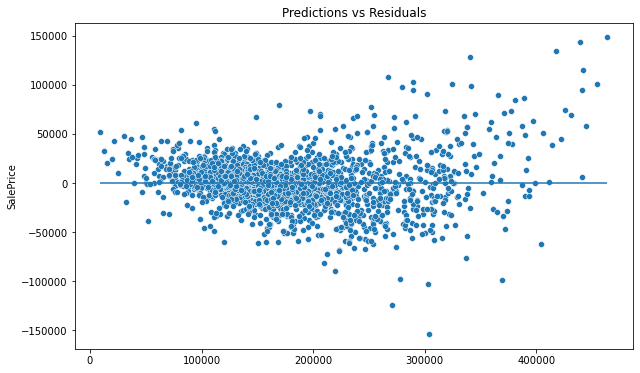

In [46]:
plt.figure(figsize = (10,6))
plt.title('Predictions vs Residuals')

sns.scatterplot(x=preds, y=resids)
plt.hlines(0,np.min(preds),np.max(preds));

In [47]:
#Model shows homoscedasticity


<AxesSubplot:title={'center':'Normality of Residuals'}, xlabel='SalePrice', ylabel='Count'>

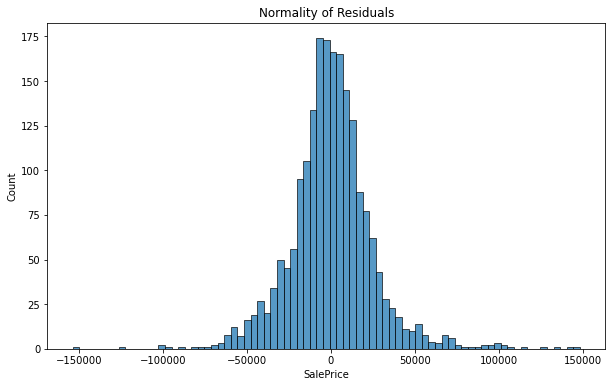

In [48]:
plt.figure(figsize=(10,6))
plt.title('Normality of Residuals')

sns.histplot(resids)

In [49]:
#The residual are normally distributed

# Regularizing our Model Using Ridge and Lasso

In [50]:
#Looking at Ridge

In [51]:
sc = StandardScaler()
Z_train=sc.fit_transform(X_train)
Z_test=sc.transform(X_test)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge_model = Ridge(alpha=104)
ridge_model.fit(Z_train, y_train)

Ridge(alpha=104)

In [54]:
ridge_model.score(Z_train, y_train),ridge_model.score(Z_test, y_test)

(0.8920386779562721, 0.8680962519812465)

In [55]:
#Looking at the best value for alpha

In [56]:
from sklearn.linear_model import RidgeCV

In [57]:
r_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [58]:
ridge_cv.alpha_

104.76157527896652

In [59]:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test)

(0.8920215114261629, 0.8680916682739872)

In [60]:
preds_ridge = ridge_cv.predict(Z_test)

In [61]:
resids_lasso = y_test - preds_ridge

In [62]:
metrics.mean_squared_error(y_test,preds_ridge,squared=False)

28571.401391687454

In [63]:
#Looking at Lasso

In [64]:
from sklearn.linear_model import Lasso, LassoCV

In [65]:
l_alphas = np.logspace(-3, 0, 100)

In [66]:
lasso_cv = LassoCV(alphas = l_alphas, cv=5, max_iter = 50000 )

In [67]:
lasso_cv.fit(Z_train, y_train);

In [68]:
lasso_cv.alpha_

1.0

In [69]:
lasso_cv.score(Z_train, y_train), lasso_cv.score(Z_test, y_test)

(0.8944164320381685, 0.86707678849304)

In [70]:
preds_lass=lasso_cv.predict(Z_test)

In [71]:
resids_lasso = y_test - preds_lass 

In [72]:
metrics.mean_squared_error(y_test,preds_lass,squared=False)

28681.102489247784

# Comparing Ridge to Lasso Coeffecients

### Making an ordered Pandas Data Frame for Ridge Regularization


In [73]:
set(zip(X,ridge_cv.coef_))

{('1_2_floor_SF', 9031.932531278906),
 ('Foundation_CBlock', 4.794689501862901),
 ('Foundation_PConc', 3563.985313720187),
 ('Foundation_Slab', 1123.3551064780238),
 ('Foundation_Stone', 553.7471039184488),
 ('Foundation_Wood', 352.5520727515905),
 ('Garage Area', 8096.06101842626),
 ('Garage Type_Attchd', 6436.797152025566),
 ('Garage Type_Basment', 1300.0196254203859),
 ('Garage Type_BuiltIn', 4661.347947051175),
 ('Garage Type_CarPort', -217.7455814979421),
 ('Garage Type_Detchd', 2869.1854747758352),
 ('Gr Liv Area', 15519.622071467493),
 ('Lot Area', 6359.597197529048),
 ('MS Zoning_C (all)', -206.9469431697087),
 ('MS Zoning_FV', 2148.601251832385),
 ('MS Zoning_I (all)', 272.09856688357706),
 ('MS Zoning_RH', -189.55465352230206),
 ('MS Zoning_RL', 513.1019174866007),
 ('MS Zoning_RM', -706.00298724764),
 ('Neighborhood_Blueste', 107.1846860542247),
 ('Neighborhood_BrDale', 1193.0723610296563),
 ('Neighborhood_BrkSide', -741.1419609456012),
 ('Neighborhood_ClearCr', 812.04572944

In [74]:
ridge_df=pd.DataFrame(set(zip(X,ridge_cv.coef_)), columns = ['Coefficient Name','Coefficient Value'])

In [75]:
ridge_df = ridge_df.sort_values(by='Coefficient Value', ascending = False)

In [76]:
ridge_df = ridge_df.reset_index(drop=True)


In [77]:
ridge_df.head(30)

,Coefficient Name,Coefficient Value
0,Gr Liv Area,15519.622071
1,Overall_Q_C,15496.618835
2,Total Bsmt SF,11491.696306
3,Neighborhood_NridgHt,9833.243839
4,1_2_floor_SF,9031.932531
5,Year Built_2008,8535.149217
6,Garage Area,8096.061018
7,Neighborhood_StoneBr,6500.976852
8,Garage Type_Attchd,6436.797152
9,Lot Area,6359.597198


### Making an ordered Pandas Data Frame for Lasso Regularization


In [78]:
set(zip(X,lasso_cv.coef_))

{('1_2_floor_SF', 7150.6678057805075),
 ('Foundation_CBlock', 1516.8063186293548),
 ('Foundation_PConc', 2963.186147408406),
 ('Foundation_Slab', 2236.4786569758867),
 ('Foundation_Stone', 699.2606368291717),
 ('Foundation_Wood', 217.8436413128799),
 ('Garage Area', 8096.839620965684),
 ('Garage Type_Attchd', 9370.523437323696),
 ('Garage Type_Basment', 2101.537288997607),
 ('Garage Type_BuiltIn', 6008.691841984716),
 ('Garage Type_CarPort', 258.1097128103023),
 ('Garage Type_Detchd', 5776.528066902233),
 ('Gr Liv Area', 20677.674793160208),
 ('Lot Area', 6737.5325251168015),
 ('MS Zoning_C (all)', 4349.969533392669),
 ('MS Zoning_FV', 14236.192099667127),
 ('MS Zoning_I (all)', 1472.8284076714629),
 ('MS Zoning_RH', 3345.9086675582926),
 ('MS Zoning_RL', 21178.33078726133),
 ('MS Zoning_RM', 16962.16255966187),
 ('Neighborhood_Blueste', 100.94946929589798),
 ('Neighborhood_BrDale', 1692.4862305087136),
 ('Neighborhood_BrkSide', -106.44934591109104),
 ('Neighborhood_ClearCr', 841.43167

In [79]:
lasso_df = pd.DataFrame(set(zip(X,lasso_cv.coef_)), columns = ['Coefficient Name','Coefficient Value'])

In [80]:
lasso_df = lasso_df.sort_values(by='Coefficient Value', ascending = False)

In [81]:
lasso_df = lasso_df.reset_index(drop=True)


In [82]:
lasso_df.head(30)

,Coefficient Name,Coefficient Value
0,MS Zoning_RL,21178.330787
1,Gr Liv Area,20677.674793
2,MS Zoning_RM,16962.162560
3,Overall_Q_C,15917.006066
4,MS Zoning_FV,14236.192100
5,Year Built_2008,13337.788544
6,Total Bsmt SF,12518.835221
7,Year Built_2006,12247.146100
8,Year Built_2007,11140.470502
9,Year Built_2005,9786.194801


### Visualizing Coeffecients for Ridge

In [83]:
ridge_df.head(30)

,Coefficient Name,Coefficient Value
0,Gr Liv Area,15519.622071
1,Overall_Q_C,15496.618835
2,Total Bsmt SF,11491.696306
3,Neighborhood_NridgHt,9833.243839
4,1_2_floor_SF,9031.932531
5,Year Built_2008,8535.149217
6,Garage Area,8096.061018
7,Neighborhood_StoneBr,6500.976852
8,Garage Type_Attchd,6436.797152
9,Lot Area,6359.597198


In [84]:
#Numerical Coeffecients for Ridge

In [85]:
coefs=ridge_df.iloc[[0,1,2,4,6]]

<AxesSubplot:title={'center':'Ridge: Top Performing Continuous Coefficients'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

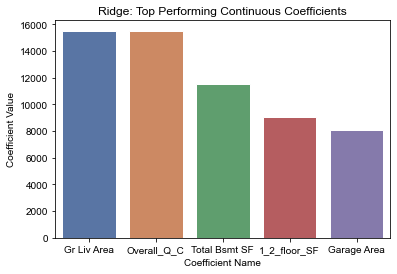

In [86]:
plt.title('Ridge: Top Performing Continuous Coefficients')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = coefs, x='Coefficient Name', y='Coefficient Value')

In [87]:
#Looking at MS Zoning

In [88]:
categ_zone = ridge_df.iloc[[22,46,83,117]]

<AxesSubplot:title={'center':'Ridge: Top Performing Ordinal Coefficients: MS Zoning'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

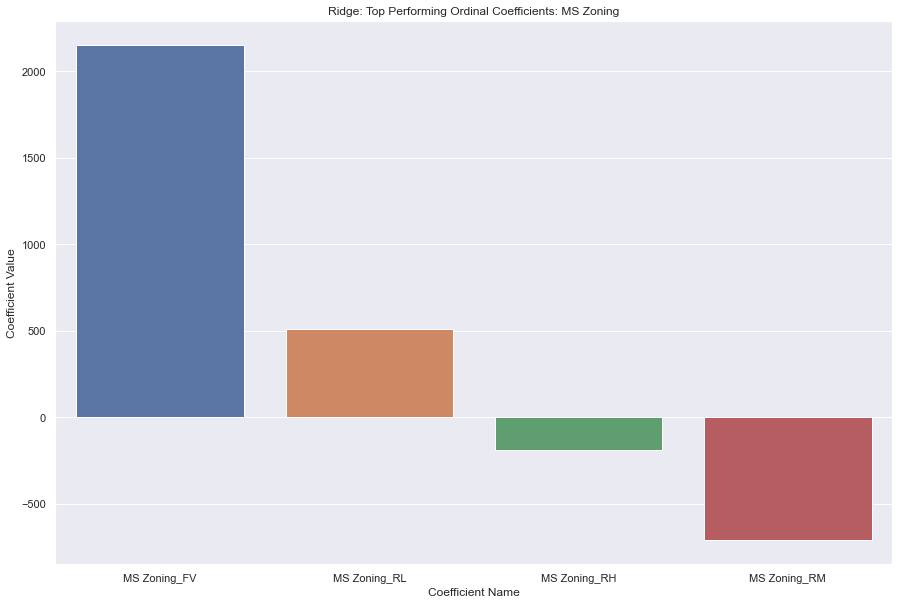

In [89]:
plt.title('Ridge: Top Performing Ordinal Coefficients: MS Zoning')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = categ_zone, x='Coefficient Name', y='Coefficient Value')

In [90]:
#Looking at Year Built

In [91]:
line_year=ridge_df.loc[ridge_df['Coefficient Name'].str.contains('Year')]

In [92]:
line_year['Coefficient Name'] = line_year['Coefficient Name'] .str[11:].astype(int)

<ipython-input-92-ba81a21d5f63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_year['Coefficient Name'] = line_year['Coefficient Name'] .str[11:].astype(int)


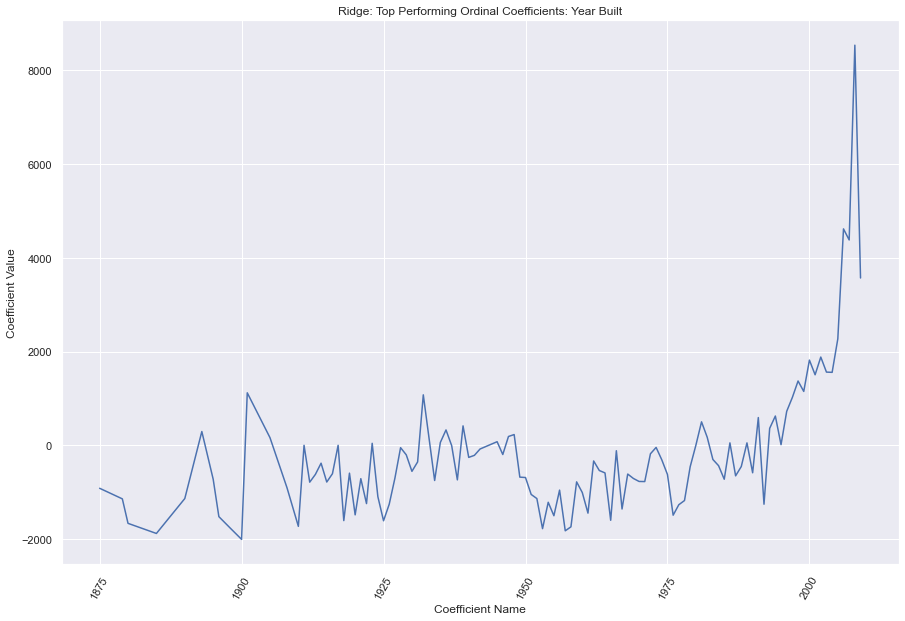

In [93]:
plt.title('Ridge: Top Performing Ordinal Coefficients: Year Built')
sns.set(rc={'figure.figsize':(30,20)})

sns.lineplot(data = line_year, x='Coefficient Name', y='Coefficient Value')
plt.xticks(rotation = 60);
sns.set(font_scale = 4)



In [94]:
#Looking at Garage Type

In [95]:
ridge_df.loc[ridge_df['Coefficient Name'].str.contains('Type')]

,Coefficient Name,Coefficient Value
8,Garage Type_Attchd,6436.797152
10,Garage Type_BuiltIn,4661.347947
19,Garage Type_Detchd,2869.185475
29,Garage Type_Basment,1300.019625
89,Garage Type_CarPort,-217.745581


In [96]:
categ_gar = ridge_df.iloc[[8,10,19,29,89]]

<AxesSubplot:title={'center':'Ridge: Top Performing Ordinal Coefficients: Garage Type'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

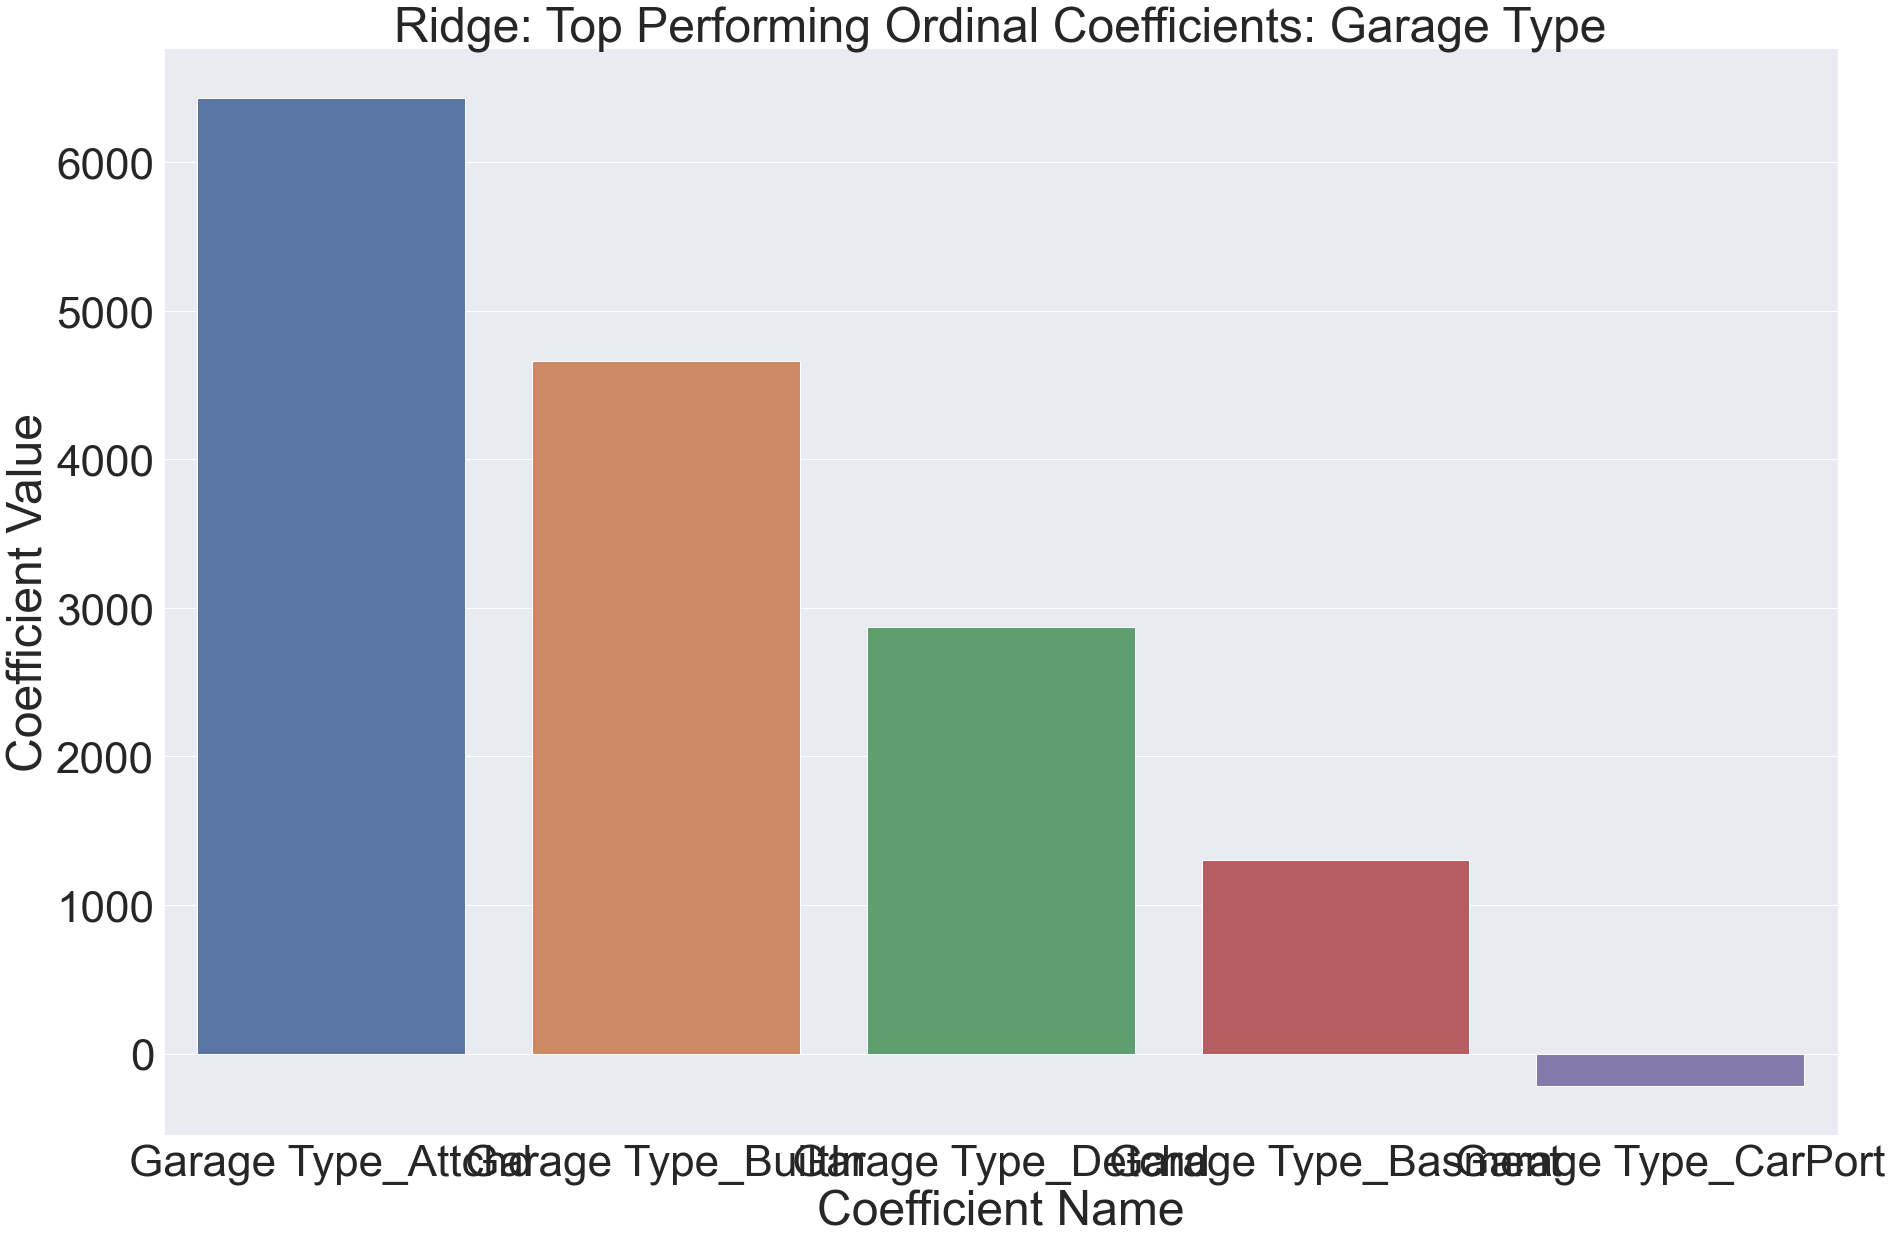

In [97]:
plt.title('Ridge: Top Performing Ordinal Coefficients: Garage Type')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = categ_gar, x='Coefficient Name', y='Coefficient Value')

### Visualizing Coeffecients for Lasso

In [98]:
#Plotting Numerical Coefficients

In [99]:
num_coefs = lasso_df.iloc[[1,3,6,12,16]]

<AxesSubplot:title={'center':'Lasso: Top Performing Continuous Coefficients'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

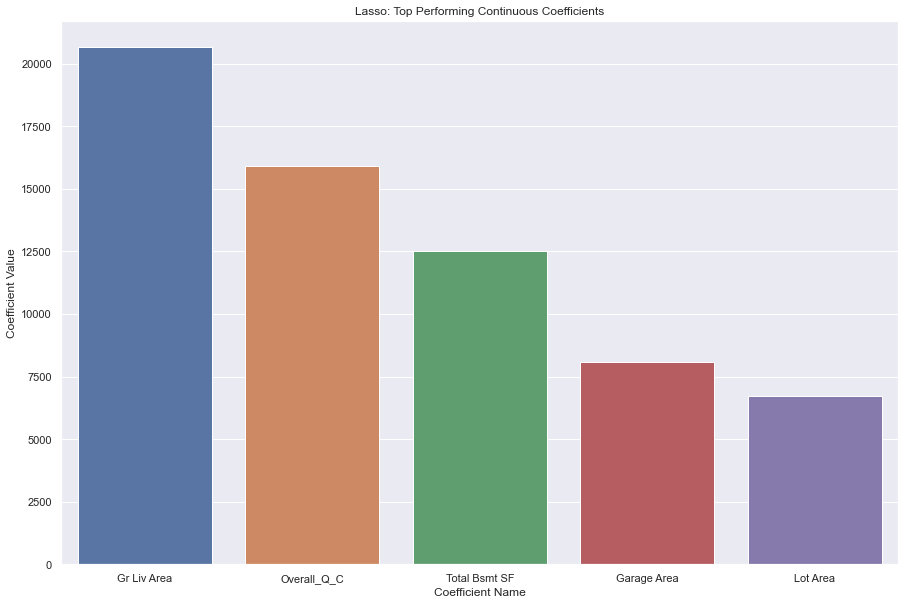

In [100]:
plt.title('Lasso: Top Performing Continuous Coefficients')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = num_coefs, x='Coefficient Name', y='Coefficient Value')

In [101]:
#Looking at MS Zoning

In [102]:
num_categ_zone = lasso_df.iloc[[0,2,4,35]]

<AxesSubplot:title={'center':'Lasso: Top Performing Ordinal Coefficients: MS Zoning'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

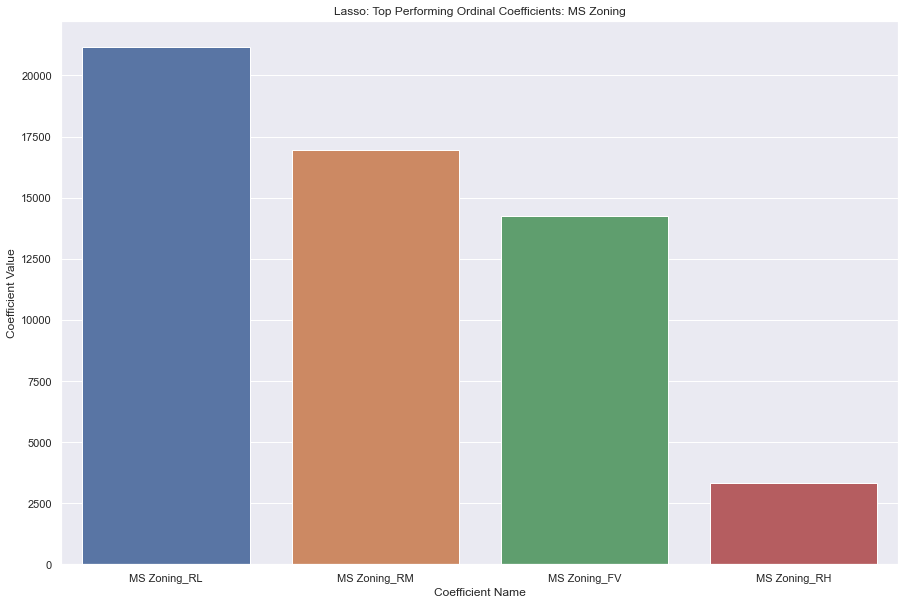

In [103]:
plt.title('Lasso: Top Performing Ordinal Coefficients: MS Zoning')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = num_categ_zone, x = 'Coefficient Name', y ='Coefficient Value')

In [104]:
#Looking at Year Built

In [105]:
year=lasso_df.loc[lasso_df['Coefficient Name'].str.contains('Year')]

In [106]:
year['Coefficient Name'] = year['Coefficient Name'] .str[11:].astype(int)

<ipython-input-106-2f8ddade4dee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['Coefficient Name'] = year['Coefficient Name'] .str[11:].astype(int)


<AxesSubplot:title={'center':'Lasso: Top Performing Ordinal Coefficients: Year Built'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

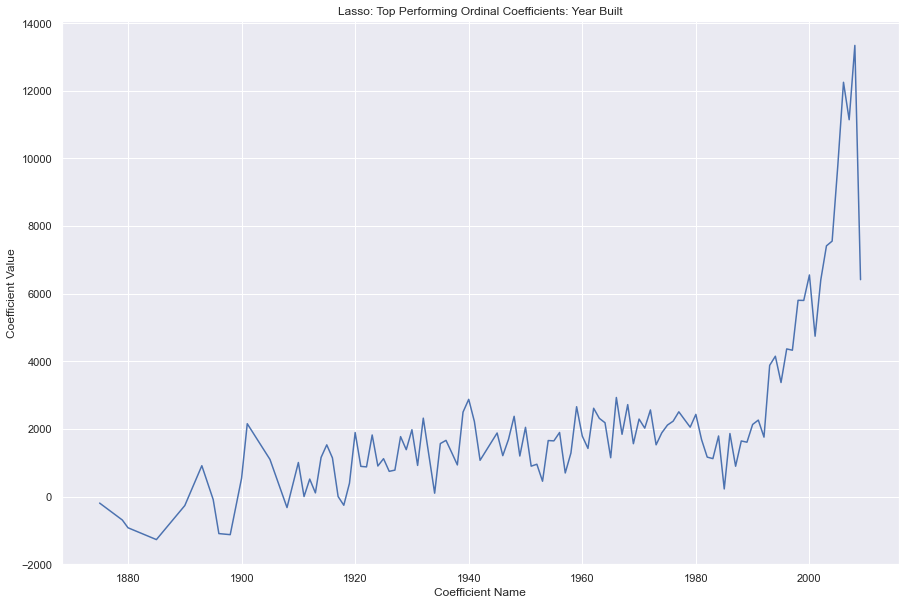

In [107]:
plt.title('Lasso: Top Performing Ordinal Coefficients: Year Built')
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = year, x = 'Coefficient Name', y ='Coefficient Value')


In [108]:
#Looking At Garage Types

In [109]:
num_categ_gar = lasso_df.iloc[[11,21,24,60,130]]

<AxesSubplot:title={'center':'Lasso: Top Performing Ordinal Coefficients: Garage Type'}, xlabel='Coefficient Name', ylabel='Coefficient Value'>

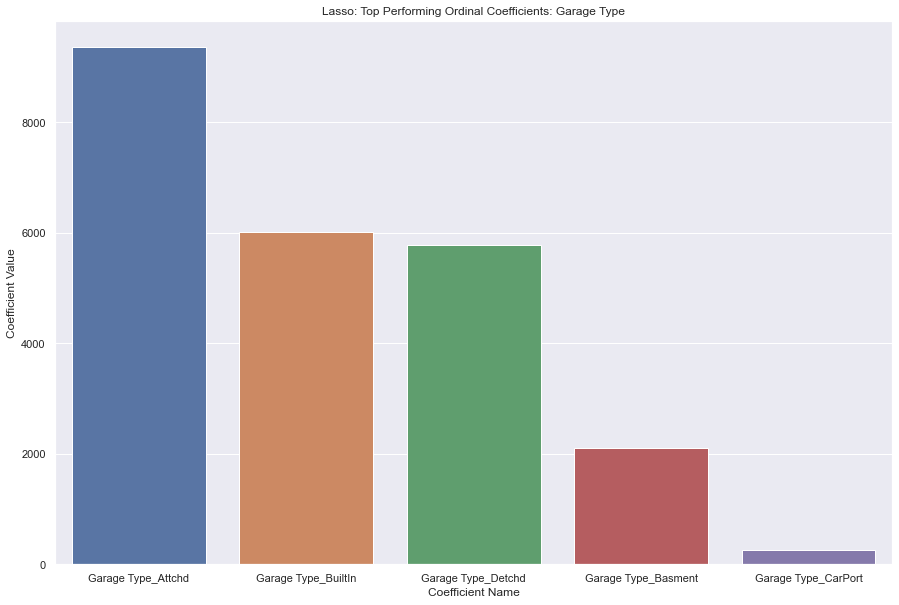

In [110]:
plt.title('Lasso: Top Performing Ordinal Coefficients: Garage Type')
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = num_categ_gar, x = 'Coefficient Name', y ='Coefficient Value')